# Esercizio 3

#### Autore: P. Scordino
#### Data: 01 maggio 2020

In [1]:
# Importazione moduli

import pandas as pd            # modulo per la manipolazione dei datafraame
import numpy as np             # modulo per calcoli algebrici
from itertools import compress # funzione del modulo intertools che permette di filtrare rispetto ad un vettore logico

In [2]:
# Caricamento dataset (file csv) e subsetting dello stesso

df = pd.read_csv('../cli-prod.csv')
df1 = df.iloc()[:, 1:8]

In [3]:
# Estrazione delle etichette delle colonne in esame

lista_prodotti = list(df.columns)
lista_prodotti.pop(0)

'ID_Cliente'

In [4]:
# Trasformazione del dataframe in un array

df_array = df1.to_numpy()

In [5]:
# Calcolo della distanza euclidea con due metodi semplici

#lista_dist2 = []

#for i in range(len(df_array) - 1):
#    lista_dist2.append(np.linalg.norm(df_array[9] - df_array[i]))
    
lista_dist = []

for i in range(len(df_array) - 1):
    lista_dist.append(np.sqrt(np.sum((df_array[9] - df_array[i]) ** 2, axis=0)))

In [6]:
# Conteggio del numero di distanza minime ed estrazione dei relativi indici

counting = []
index = []
for i, j in enumerate(lista_dist):
    count = 0
    if j == min(lista_dist):
        count += 1
        counting.append(count)
        index.append(i)

In [7]:
# Estrazione dei nomi 

ID_Cliente = list(df['ID_Cliente'][0:9])
ID_Cliente_z = list(df['ID_Cliente'][9:10])

In [8]:
# Cliente o Clienti con distanza minima rispetto al cliente "Z"

df.iloc[index, ]

,ID_Cliente,sesso_M,sesso_F,patata,carota,sedano,broccolo,verza
1,B,2,0,1,0,1,1,0


In [9]:
# Cliente "Z"

df.iloc[9:10, ]

,ID_Cliente,sesso_M,sesso_F,patata,carota,sedano,broccolo,verza
9,Z,2,0,1,0,0,1,0


In [10]:
# Ricerca dei prodotti mancanti rispetto al Cliente "Z" e ai clienti con minore distanza euclidea

lista_logica = []
for i, j in enumerate(index):
     lista_logica.append(list(df_array[9] != df_array[j]))

In [11]:
# Risultato (deve essere generalizzato!)

risultato = list(compress(lista_prodotti, lista_logica[0]))
print(f'Al cliente "Z" viene proposto il seguente prodotto: ', risultato[0])

Al cliente "Z" viene proposto il seguente prodotto:  sedano


### Creazione di un dendrogramma

In [12]:
X = df_array

In [13]:
X

array([[2, 0, 1, 0, 1, 0, 0],
       [2, 0, 1, 0, 1, 1, 0],
       [2, 0, 1, 0, 1, 0, 1],
       [2, 0, 1, 0, 1, 0, 1],
       [0, 2, 1, 0, 1, 0, 1],
       [0, 2, 1, 0, 1, 1, 1],
       [0, 2, 1, 0, 1, 1, 1],
       [0, 2, 1, 0, 1, 1, 1],
       [0, 2, 1, 0, 1, 0, 0],
       [2, 0, 1, 0, 0, 1, 0]])

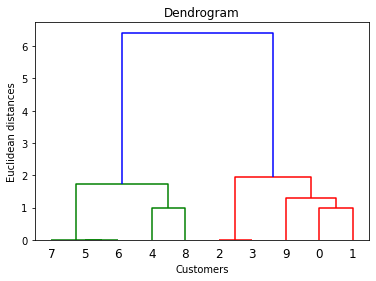

In [14]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()